In [35]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
def plot_training_loss(data, num_epochs):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    batches_per_epoch = len(data) // num_epochs

    xs = range(len(data))
    tick_interval = 10

    plt.plot(xs, data, color=colors[0], label="Training Loss")

    window_size = 10
    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    xs_ma = range(window_size//2, len(data) - window_size//2 + 1, 1)
    plt.plot(xs_ma, moving_avg, color=colors[1], label='Moving Average')

    plt.title('Loss per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(data)+1, tick_interval), range(0, len(data)+1, tick_interval))
    plt.tick_params(axis='both', which='major', labelsize=12)

    for epoch in range(1, num_epochs+1):
        epoch_end = epoch * batches_per_epoch
        plt.axvline(x=epoch_end-1, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


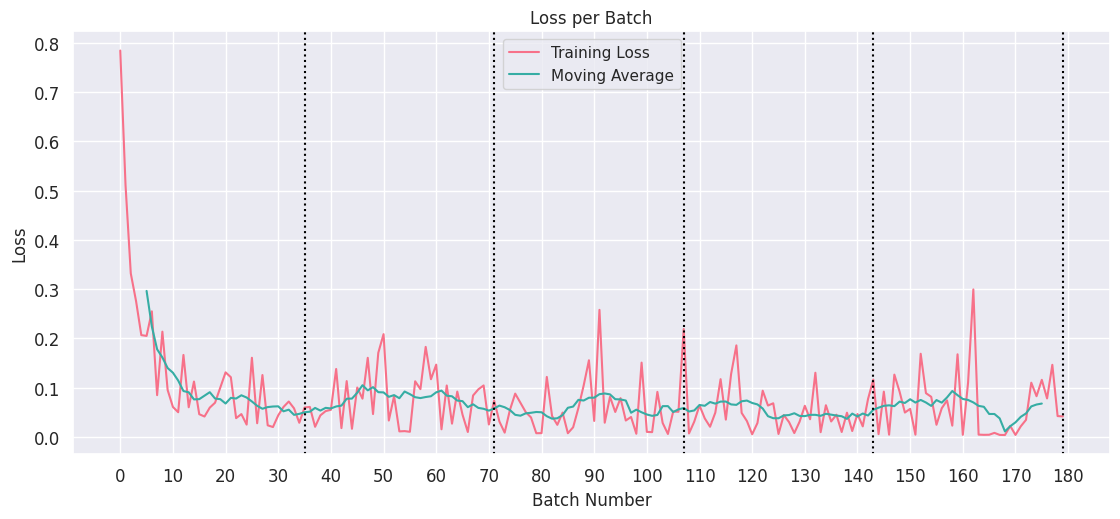

In [78]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_6/checkpoints/train_loss.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data, 5)


In [ ]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_5/checkpoints/train_loss.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], data['num_epochs'])
